In [19]:
% matplotlib inline
% load_ext autoreload
% autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [21]:
from __future__ import print_function
import tensorflow as tf
import numpy as np
from deep_visual_odometry.kitti_utils import KITTIdata
from matplotlib import pyplot as plt


from deep_visual_odometry.input_model import test_input_model
from deep_visual_odometry.odometry_model_v2 import OdomModelV2 

In [3]:
# Load dataset
basedir = 'dataset'
kitti_data = KITTIdata(basedir, sequences = ['00'], img_size=(150,50))

completed load sequence 00 data


In [14]:
inputs, inter_inputs, targets = kitti_data.get_full_sequence(sequence='00')

In [16]:
pred_velocities = test_input_model(inputs)

INFO:tensorflow:Restoring parameters from model/CNN_Velocity_Model


In [23]:
batch_size = None # testing
num_steps = 16
rnn_size = 128
num_layers = 2
learning_rate = 0.001
odometry_model = OdomModelV2(batch_size = batch_size, 
                  num_steps = num_steps,
                  cell_type = 'GRU',
                  rnn_size = rnn_size,
                  num_layers = num_layers,
                  learning_rate = learning_rate,
                  sampling = True)

created multi layer rnn cell
rolled out cell for num_steps 
reshaped outputs
shape of outputs (1, 1, 3)
shape of targets (1, 1, 3)
odometry model initialized


In [34]:
predictions = odometry_model.test(tf.train.latest_checkpoint('checkpoints'), pred_velocities.reshape(-1, 2), 
                                  initial_pose = inter_inputs[0, 2:5])

INFO:tensorflow:Restoring parameters from checkpoints/i251_l128.ckpt


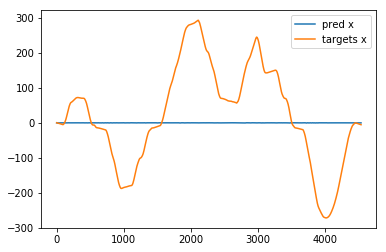

In [36]:
j = 0
plt.plot(predictions[:,j],label = 'pred x')
plt.plot(targets[:,j],label = 'targets x')
plt.legend()
plt.savefig('x_predictions_RNN_iter1000.jpg')
plt.show()

Text(0,0.5,'y')

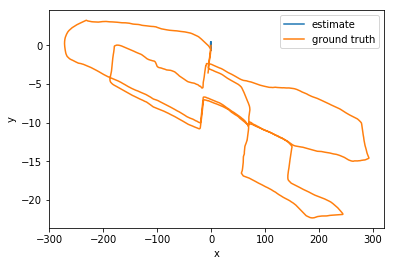

In [37]:

plt.plot(predictions[:,0],predictions[:,1],label = 'estimate')
plt.plot(targets[:,0],targets[:,1],label = 'ground truth')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')

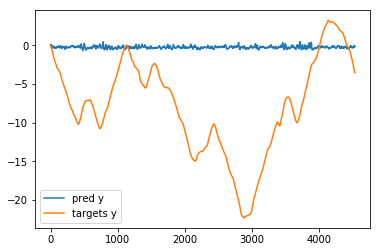

In [38]:
j = 1
plt.plot(predictions[:,j],label = 'pred y')
plt.plot(targets[:,j],label = 'targets y')
plt.legend()
plt.savefig('y_predictions_RNN_iter1000.jpg')
plt.show()

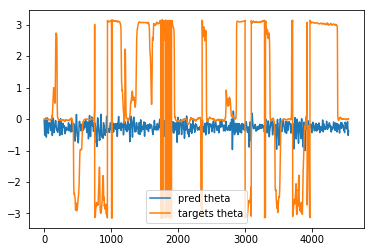

In [39]:
j = 2
plt.plot(predictions[:,j],label = 'pred theta')
plt.plot(targets[:,j],label = 'targets theta')
plt.legend()
plt.savefig('theta_predictions_RNN_iter1000.jpg')
plt.show()